# TP1 : Résolution approchée d'un problème de Cauchy

Soit $I \subset \mathbb{R}$ un intervalle et $f :I\times \mathbb{R}^d \rightarrow \mathbb{R}^d$ vérifiant les hypothèses du théorème de Cauchy-Lipschitz.
Pour $t_0 \in I$, on considère le problème de Cauchy $(P)$ :
$$
\left\lbrace
\begin{array}{l}
y'(t)  =f(t,y(t)) \: , \quad (E) \\
y(t_0) = y_\ast \in \mathbb{R}^d \text{ donné.}
\end{array} \right.
$$
Soit $y : J \subset I \rightarrow \mathbb{R}^d$ la solution maximale de $(P)$ et $[t_0,t_0 +T] \subset J$.
On veut approcher numériquement $y$ sur $[t_0,t_0 +T]$, connaissant $y_\ast = y(t_0)$ ou au moins une valeur approchée $y_0$ de $y_\ast$. Pour résoudre numériquement ce problème,  on se donne une subdivision 
$t_0 < t_1 <
. . . < t_N = t_0 + T$ de $[t_0, t_0 + T ]$ et
on cherche des valeurs approchées $y_1, \ldots, y_N$ de $y(t_1), \ldots, y(t_N)$, on définit ensuite une fonction $y_{h}^{app}$ continue sur $[t_0,t_0 +T]$ qui interpole linéairement $(t_0, y_0)$, ... $(t_N, y_N)$.

On renvoie au cours [C1EulerExplicite.pdf](https://ecampus.paris-saclay.fr/pluginfile.php/1670398/course/section/298646/C1EulerExplicite.pdf?time=1673948155994) pour l'étude théorique des schémas d'ordre 1 à pas constant. On va se concentrer dans un premier temps sur le schéma d'*Euler explicite* :
$$
\begin{cases} \tag{S}
y_{n+1}  = y_n + h f(t_n, y_n) \\
t_{n+1} = t_n + h \, ,
\end{cases}
$$


## Exercice 1.- Schéma d'Euler explicite 1d


1. \'Ecrire une fonction `euler1D` qui détermine la solution approchée 
 du problème de Cauchy par la méthode d'Euler explicite. Cette fonction aura comme arguments d'entrée :  `fun`, `y0`, `t0`, `T` et `h` où 

* `fun` désigne la fonction définissant le second membre de $(E)$, elle prendra comme arguments un réel $t$ et un réel $y$,
* `(t0,y0)` est la condition initiale, 
* `T` est la longueur de l'intervalle, de sorte que `$[t0,t0+T]$` est l'intervalle sur lequel on cherche à résoudre $(E)$,
* `h` est le pas de temps.

Votre fonction `euler1D` devra renvoyer une liste `[tps,sol]` où `tps` est le vecteur (de type `numpy array`) des temps $t_0, \ldots , t_N$ et `sol` est le vecteur  (de type `numpy array` également) des valeurs approchées $y_0, \ldots , y_N$.

On résume ci-après la structure attendue :
``` python
def euler1D(fun, t0, T, y0, h):
    tps = xxxx
    N = tps.size
    sol = np.zeros(N)
    sol[0]= xxxx
    for i in range(xx):
        xxxx
    return [tps, sol]
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.close("all") #ferme toutes les fenetres graphiques

In [2]:
def euler1D(fun, t0, T, y0, h):

    """ fun est le second membre de l'equation y' = fun(t,y)
        [t0,t0+T] est l'intervalle de temps sur lequel on resout
        y0 est la condition initiale y(t0)=y0
        h est le pas de temps"""
    """euler renvoie
        * tps un tableau numpy 1d contenant la discretisation de l'intervalle de temps
        * sol un tableau numpy 1d de taille tps.size """
        
    tps = np.arange(t0, t0+T+h, h) #il faut aller jusqu en t0 + T + h avec def de arange
    N = tps.size
    sol = np.zeros(N)
    sol[0]=y0
    for i in range(N-1):
        sol[i+1] = sol[i] + h*fun(tps[i], sol[i])
    
    return [tps, sol]

2. Tester votre schéma d'Euler sur le problème
$$ \tag{$E_1$}
\left\lbrace \begin{array}{ll}
y'(t) & = -y(t) + t + 1\\
y(0) & = 1
\end{array} \right.
$$
dont on sait (n'est-ce pas ?!) calculer la solution exacte $y_e(t) = \exp(-t) + t$. On tracera sur une même figure la solution exacte et la solution approchée, sur l'intervalle $[0,2]$ obtenue pour `h = 0.2` puis `0.05`. *Il s'agit ici de comprendre qui est la fonction `fun` et la définir correctement*.

Dans le problème de Cauchy $(E_1)$, on peut réécrire l'EDO sous la forme $y^\prime(t) = f(t,y(t))$ où $f : \mathbb{R} \times \mathbb{R} \rightarrow \mathbb{R}$, $(t,y) \mapsto -y+t+1$.

*Pratique :* vous pouvez récupérer directement `tps` et `sol` avec `tps,sol = euler1D(fun, t0, T, y0, h)`.

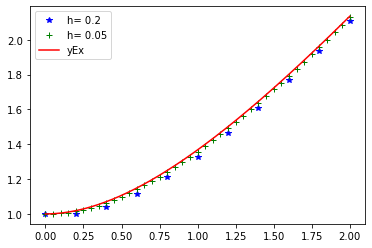

In [3]:
def secondmembreE1(t,y): # 2nd membre de E1, attention l'ordre des arguments doit correspondre a celui de 'fun' dans euler1D
    return -y+t+1

#Parametres
t0 = 0  
T = 2
y0 = 1

#solution exacte
def solE1(t):
    return np.exp(-t) + t

# Pas de temps h = 0.2
h1 = 0.2
tps1, sol1 = euler1D(secondmembreE1, t0, T, y0, h1)
plt.figure(1)
plt.plot(tps1, sol1, '*b', label="h= 0.2")

# Pas de temps h = 0.05
h2 = 0.05
tps2, sol2 = euler1D(secondmembreE1, t0, T, y0, h2)
plt.plot(tps2, sol2, '+g', label="h= 0.05")

# pour le trace de la solution exacte
tt = np.linspace(t0,t0+T,1000) #on discretise [t0, t0 +T] avec 1000 points
yEx = solE1(tt) #on calcule les valeurs de ye en ces points

plt.plot(tt, yEx, color="red", label="yEx")
plt.legend(loc="best")


L'erreur de convergence (en norme sup) entre la solution exacte $y_e$ et la solution approchée $(y_n)_{n \leq N}$ calculée par le schéma d'Euler $(S)$ est donnée par
$$
e(h) := \max_{n=1, \ldots , N} \| y_e(t_n) - y_n \| \: .
$$

3. En vous appuyant sur le cours, justifier que dans le cas présent i.e. schéma d'Euler $(S)$ associé au problème de Cauchy $(E_1)$ sur l'intervalle $[0,2]$, l'erreur $e(h)$ tend vers $0$ quand le pas de discrétisation $h$ tend vers $0$.

Le second membre de $(E_1)$ est
- de classe $\mathrm{C}^1$, on a vu en cours que le schéma d'Euler est alors consistant,
- linéaire et en particulier Lipschitz, on a vu en cours que le schéma d'Euler est alors stable.

On conclut par le cours que le schéma d'Euler est consistant et stable donc convergent.


4. Calculer $e(h)$ pour `h = 0.2` puis `h = 0.05`.

*Pratique :* on pourra utiliser la fonction `np.linalg.norm(u, np.inf)` qui renvoie prend en argument un `numpy array u` de taille `N` et renvoie $\max_{i=0, \ldots, N-1} |u[i]|$.

In [4]:
e1 = np.linalg.norm(sol1 - solE1(tps1), np.inf)
print("e(0.2)="+str(e1))
e2 = np.linalg.norm(sol2 - solE1(tps2), np.inf)
print("e(0.05)="+str(e2))

e(0.2)=0.04019944117144236
e(0.05)=0.009393518762900177


## Exercice 2.- Ordre des schémas

On reprend dans cet exercice le problème de Cauchy $(E_1)$ et on garde les paramètres de résolution `t0 = 0`, `T = 2` et `y0 = 1` tout au long de l'énoncé. On va comparer le schéma d'Euler déjà implémenté à l'exercice 1 avec le schéma du point milieu
$$ \tag{$S_{mil}$}
\begin{cases} 
   t_{n,2} = t_n +\frac{1}{2}h \\
   y_{n,2} = y_n + \frac{1}{2}h f(t_n, y_n)\\
   y_{n+1} = y_n + h f(t_{n,2}, y_{n,2})\\
   t_{n+1} = t_n +h.\\
\end{cases}
$$

1. En reprenant la structure de la fonction `euler1D`, écrire une fonction `pointMilieu1D` qui implémente le schéma du point milieu.

In [5]:
def pointMilieu1D(fun, t0, T, y0, h):

    """ fun est le second membre de l'equation y' = fun(t,y)
        [t0,t0+T] est l'intervalle de temps sur lequel on resout
        y0 est la condition initiale y(t0)=y0
        h est le pas de temps"""
    """euler renvoie
        * tps un tableau numpy 1d contenant la discretisation de l'intervalle de temps
        * sol un tableau numpy 1d de taille tps.size """
        
    tps = np.arange(t0, t0+T+h, h) #il faut aller jusqu en t0 + T + h avec def de arange
    N = tps.size
    sol = np.zeros(N)
    sol[0]=y0
    for i in range(N-1):
        p1 = fun(tps[i],sol[i])
        sol[i+1] = sol[i] + h*fun(tps[i]+0.5*h, sol[i]+0.5*h*p1)
    
    return [tps, sol]

2. Représenter les solutions approchées obtenues en utilisant le schéma d'Euler explicite et le schéma du point milieu, ainsi que la solution exacte sur une nouvelle figure pour `h=0.2` par exemple.

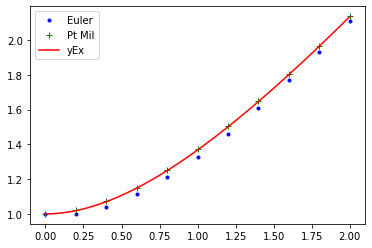

In [6]:
# Pas de temps h = 0.2
tps3, sol3 = pointMilieu1D(secondmembreE1, t0, T, y0, h1)
plt.figure(2)
plt.plot(tps1, sol1, '.b', label="Euler")
plt.plot(tps3, sol3, '+g', label="Pt Mil")
plt.plot(tt, yEx, color="red", label="yEx")
plt.legend(loc='best')

On veut à présent étudier et comparer la décroissance de l'erreur $e(h)$ en fonction du pas de temps $h$ pour le schéma d'Euler et le schéma du point milieu. On définit pour cela un vecteur de pas de temps `vecth`$=[2^{-1}, \ldots, 2^{-9} ]$.

3. Pour $h \in$ `vecth`, calculer $e(h)$ et regrouper les valeurs obtenues dans un `numpy array E` tel que `E[i] = e(vecth[i])` pour `i = 0 ... 8`. Effectuer ce calcul pour le schéma d'Euler explicite puis pour le schéma du point milieu.

In [7]:
vecth = 0.5**np.arange(1,10) # vecteurs des pas de temps h
E1 = np.zeros(9) # e(h) pour Euler
E2 = np.zeros(9) # e(h) pour point milieu

for s in range(9):
    tps, sol = euler1D(secondmembreE1, t0, T, y0, vecth[s])
    E1[s] = np.linalg.norm(solE1(tps) - sol, np.inf)
    tps, sol = pointMilieu1D(secondmembreE1, t0, T, y0, vecth[s])
    E2[s] = np.linalg.norm(solE1(tps) - sol, np.inf)

print('E1 euler :')
E1

E1 euler :


array([0.11787944, 0.05147319, 0.02427053, 0.01180531, 0.00582415,
       0.00289292, 0.00144173, 0.00071969, 0.00035955])

In [8]:
print('E2 point milieu :')
E2

E2 point milieu :


array([2.27455588e-02, 4.64958867e-03, 1.05380291e-03, 2.51097545e-04,
       6.13022024e-05, 1.51458794e-05, 3.76427830e-06, 9.38312193e-07,
       2.34234407e-07])

4. En reprenant la preuve de la consistance su schéma d'Euler (Proposition 1), vérifier que le schéma du point milieu est consistant à l'ordre $2$ dans le cas présent (c'est plus généralement vrai dès que $f$ est de classe $\mathrm{C}^2$).

Tout d'abord, observons que le schéma du point milieu est bien un schéma explicite à un pas constant et plus précisément, on peut réécrire $(S_{mil})$ comme
$$
y_{n+1} = y_n + h \Phi (t_n, y_h, h) \quad \text{en posant} \quad \Phi(t,x,h) = f \left( t + \frac{h}{2} , x + \frac{h}{2} f(t,x) \right) \: .
$$

On suppose $f$ de classe $\mathrm{C}^2$ et on fixe une solution $y$ de $(E)$, qui est donc de classe $\mathrm{C}^3$, définie sur le segment $[t_0, t_0 + T] \subset I$. Soit $N \in \mathbb{N}^\ast$ et $t_0 < t_1 < \ldots < t_N = t_0 + T$ la subdivision uniforme associée de pas $h = \frac{T}{N}$. Estimons pour $n \in \{ 0, \ldots, N-1\}$ l'erreur de consistance locale du schéma du point milieu 
$$
\tau_n(h) = y(t_{n+1}) - y(t_n) - h f \Big( t_n + \frac{h}{2} , y(t_n) + \frac{h}{2} \underbrace{f(t_n,y(t_n))}_{y^\prime(t_n)} \Big) \: .
$$
On va développer $\displaystyle f \Big( t_n + \frac{h}{2} , y(t_n) + \frac{h}{2} y^\prime(t_n) \Big) $ à l'ordre $2$ autour de $(t_n, y(t_n))$.

On remarque que $y$ et $y^\prime$ sont continues donc bornées par $R > 0$ sur $[t_0 , t_0 + T]$ de sorte que le segment reliant $(t_n,y(t_n))$ et $(t_n,y(t_n)) + \frac{h}{2} (1, y^\prime(t_n))$ est inclus dans un compact $[t_0, t_0 + T] \times K$ indépendant de $n$ et $h$. On note alors $M = \sup_{[t_0, t_0 + T] \times K} \| D^2 f \| > 0$.

Par l'inégalité de Taylor-Lagrange appliquée à $f$ entre $(t_n,y(t_n))$ et $(t_n,y(t_n)) + \frac{h}{2} (1, y^\prime(t_n))$, on obtient 
$$
\Big| f \Big( t_n + \frac{h}{2} , y(t_n) + \frac{h}{2} y^\prime(t_n) \Big)  - \underbrace{f(t_n, y(t_n))}_{y^\prime(t_n)} -  \underbrace{ \frac{h}{2} \partial_1 f(t_n, y(t_n)) - \frac{h}{2} \sum_{j=2}^{d+1} y_j^\prime(t_n) \partial_j f (t_n,y(t_n)) }_{-\frac{h}{2} Df(t_n, y(t_n)) \cdot (1, y^\prime(t_n)) = -\frac{h}{2} y^{\prime\prime}(t_n)}  \Big| \leq h^2 \frac{1 + \| y^\prime(t_n) \|^2}{4} M \leq C h^2 \: .
$$
On en déduit que 
$$
\| \tau_n(h) \| \leq \Big| y(t_{n+1}) - y(t_n) - h \left( y^\prime(t_n) + \frac{h}{2} y^{\prime\prime}(t_n) \right) \Big| + C h^3
$$
et on conclut en appliquant l'inégalité de Taylor-Lagrange à $y$ avec reste d'ordre $3$ entre $t_n$ et $t_{n+1}$, ce qui donne
$$
\| \tau_n(h) \| \leq \frac{h^3}{3!} \sup_{[t_0, t_0 + T]} \| y^{(3)} \| + C h^3 \leq \tilde{C} h^3 \quad \Rightarrow \quad \tau(h) \leq N \tilde{C} h^3 = T \tilde{C} h^2 \: .
$$

5. Toujours à l'aide du cours, en reprenant notamment la preuve du Théorème 1, vérifier que pour chacun des deux schémas (Euler et point milieu), il existe une constante $C > 0$ et un exposant $p \in \mathbb{N}^\ast$ tels que 
$$ \tag{1}
e(h) \leq C h^p \: .
$$
Que vaut $p$ pour chacun des deux schémas ? *Attention,* $e(h)$ n'est pas l'erreur de consistance.

En reprenant la preuve de la convergence du schéma d'Euler et en supposant qu'on ne commet pas d'erreur sur la condition initiale, on vérifie que la stabilité du schéma assure que le contrôle de l'erreur de consistance se transmet à l'erreur de convergence: $p=1$ pour Euler explicite et $p=2$ pour le point milieu.

On va vérifier numériquement la "prédiction théorique". Pour cela, on commence par représenter l'erreur $e(h)$ en fonction de $h$ pour chacun des deux schémas (on reprend les valeurs stockées dans les vecteurs `E1`et `E2`).

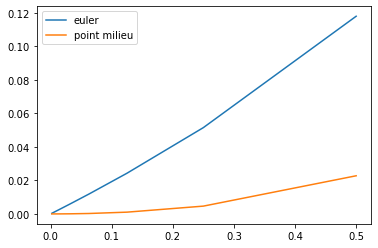

In [9]:
plt.plot(vecth,E1,label='euler')
plt.plot(vecth,E2,label='point milieu')
plt.legend()

Afin de préciser l'ordre de convergence numérique observé, on va se placer en échelle logarithmique (c'est d'ailleurs pour cela qu'on a choisi pour le vecteur `vecth` des puissances successives de $0.5$). L'inégalité $(2)$ devient alors
$$
\ln e(h) \leq \ln C + p \ln h \: .
$$

6. Sur une nouvelle et même figure, représenter $e(h)$ en fonction de $h$ avec une échelle logarithmique sur chaque axe et pour chacun des deux schémas, on pourra utliliser la fonction `plt.loglog`.

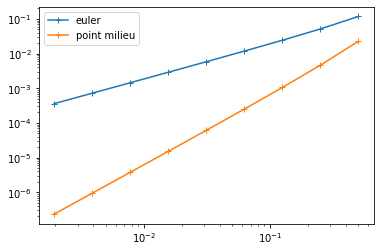

In [10]:
plt.loglog(vecth,E1, '+-', label='euler')
plt.loglog(vecth,E2, '+-', label='point milieu')
plt.legend()

Bien que $(2)$ ne soit a priori qu'une inégalité, sur la figure précédente, ce que vous observez ressemble à deux droites de pentes différentes. La fonction `np.polyfit` permet d'effectuer une régression comme le montre l'exemple suivant.

a=0.9886931953659417


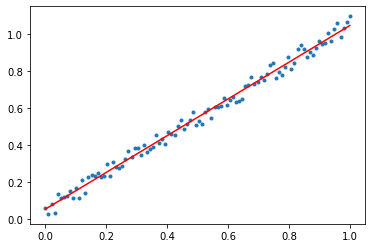

In [11]:
x = np.linspace(0,1,100)
y = x + 0.1*np.random.rand(100)
plt.plot(x,y,'.') # on représente les points d'abscisses x et d'oredonnées y

a,b = np.polyfit(x,y,1) # a : pente et b : ordonnée à l'origine de la droite de régression trouvée
print('a='+str(a))

yreg = a*x + b
plt.plot(x,yreg,'r') # droite de régression

7. Estimer la pente des droites obtenues en échelle logarithmique et en déduire l'ordre de convergence numérique observé pour chacun des deux schémas.

In [12]:
x = np.log(vecth)
a1,b1 = np.polyfit(x, np.log(E1),1)
a2,b2 = np.polyfit(x, np.log(E2),1)
print('eurler :'+str(a1))
print('point milieu :'+str(a2))

eurler :1.0347343115619796
point milieu :2.056710242400875


On observe un ordre de numérique de $1.03$ pour le schéma d'Euler et un ordre numérique de $2.05$ pour le schéma du point milieu, ce qui correspond aux ordre théoriques.

8. *Pour ceux qui ont le temps,* Reprendre l'étude en ajoutant le schéma de Runge-Kutta $4$
$$
\begin{cases} 
   t_{n,2}=t_{n}+\frac{h}{2}\\
   t_{n+1} = t_n + h\\
   y_{n,2}=y_n+\frac{h}{2}f(t_{n},y_n)\\
   y_{n,3}=y_{n}+\frac{h}{2}f(t_{n,2},y_{n,2})\\
   y_{n,4}=y_{n}+ h f(t_{n,2},y_{n,3})\\
   y_{n+1}=y_n+\frac{h}{6}\Big(f(t_{n},y_{n})+2f(t_{n,2},y_{n,2})+2f(t_{n,2},y_{n,3})
   +f(t_{n+1},y_{n,4})\Big).
\end{cases}
$$

## Exercice 3.- Consistance et stabilité : illustration

On reprend le problème de Cauchy $(E_1)$ et on va analyser les premières itérations du schéma d'Euler, pas à pas. On commence par représenter les erreurs liées à la consistance du schéma
$$
h \tau_n(h) = y(t_{n+1}) - \left[ y(t_n) + h f (t_n, y(t_n)) \right] \quad \text{pour } n = 0 \ldots N-1 \: .
$$
On conservera les paramètres `t0 = 0` et `h=0.2` dans cet exercice.

1. Calculer $z_n = y(t_n) + h f (t_n, y(t_n))$ pour $n = 0, 1, 2$ et représenter sur une même figure la solution exacte et les points $(t_{n+1}, z_n)$.

2. Ajouter à cette figure la solution approchée donnée par le schéma d'Euler passant par les points $(t_n, y_n)$ pour $n = 0,1,2,3$.

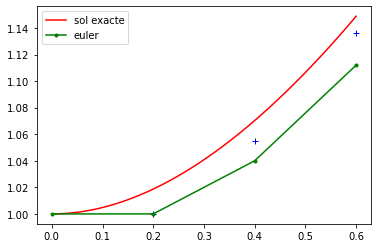

In [13]:
h = 0.2
t0 = 0

# on visualise les erreurs de consistance en bleu
t = t0 
for i in range(3):
    z = solE1(t) + h*secondmembreE1(t, solE1(t))
    t = t +h
    plt.plot(t,z,'+b')
tps = np.linspace(t0,t,100)
plt.plot(tps, solE1(tps), color='red', label="sol exacte")
plt.legend()

# on visualise leur evolution à travers le schema d'Euler
tps1, sol1 = euler1D(secondmembreE1, t0, t, y0, h)
plt.plot(tps1,sol1,'.-g', label='euler')
plt.legend()

En reprenant la figure précédente, on identifie en bleu ci-dessous l'erreur de consistance notée
$$
\begin{align*}
\varepsilon_n & = |\tau_n(t)| = | y(t_{n+1}) - y(t_n) - h \phi(t_n,y(t_n),h) |\\
& = |  y(t_{n+1}) - z_{n+1} | \: .
\end{align*}
$$
On observe que cette erreur n'est pas la seule à intervenir dans l'erreur de convergence i.e. dans l'écart $|y(t_n) - y_n|$ entre la solution exacte et la solution approchée donnée par le schéma : l'erreur en rose s'y ajoute.

![](TP1ex3.png)
